In [22]:
# !pip3 install openpyxl

In [23]:
# !pip3 install patsy

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti TC']
import seaborn as sns
import numpy as np
import pylab 
import scipy.stats as stats
from scipy.stats import shapiro,ttest_rel
from scipy.stats import pearsonr

In [55]:
from datetime import date
before = pd.read_excel("機構住民家屬測驗題前測_202311060100_65483abf0cd6f.xlsx", sheet_name="前測", usecols=['編號:', 'Unnamed: 129', '1.1 出生年月：民國______年______月'])
before.rename(columns={'編號:': 'ID', 'Unnamed: 129': '前測', '1.1 出生年月：民國______年______月':'出生'}, inplace=True)
before['出生'] = pd.to_datetime(before['出生'])
before['年齡'] = before['出生'].apply(lambda x:date.today().year - x.year)
before.drop_duplicates(inplace=True)
print(before)

    ID         出生  前測  年齡
0    1 1930-08-06  50  93
1    2 1936-07-25  50  87
2    3 1947-11-26  50  76
3    4 1954-08-20  50  69
4    5 1958-11-04  50  65
5    6 1927-10-20  50  96
6   10 1958-08-16  50  65
7   19 1975-03-13  50  48
8   20 1964-06-10  50  59
9   21 1950-05-12  48  73
10  22 1974-02-28  50  49
11  23 1951-05-09  49  72
12  24 1966-04-05  50  57
13  25 1959-06-24  50  64
14  26 1957-10-28  50  66
15  27 1978-08-15  50  45
16  28 1946-03-04  50  77
17  29 1962-09-08  50  61
18  30 1974-04-30  50  49
19  32 2023-08-11  50   0
20  33 1958-08-09  49  65
21  37 1926-02-15  50  97
22  41 1984-06-04  49  39
23  42 1976-08-20  49  47
24  45 1978-10-21  50  45
25  48 2023-08-11  47   0
26  50 1986-06-17  49  37


In [56]:
after = pd.read_excel("機構住民家屬測驗題前測_202311060100_65483abf0cd6f.xlsx", sheet_name="後測", usecols=['編號:', '備註'])
after.rename(columns={'編號:': 'ID', '備註': '後測'}, inplace=True)
after = after.dropna(axis='rows')
print(after)

    ID    後測
0    1  50.0
1    2  50.0
2    3  50.0
3    4  50.0
4    5  50.0
5    6  50.0
6   10  50.0
14  26  50.0
15  27  50.0
16  28  50.0
17  29  50.0
18  30  50.0
19  32  50.0
20  33  50.0
21  37  50.0
22  41  50.0
23  42  50.0
24  45  50.0
25  48  50.0


In [57]:
df = pd.merge(before, after, on='ID')
df

,ID,出生,前測,年齡,後測
0,1,1930-08-06,50,93,50.0
1,2,1936-07-25,50,87,50.0
2,3,1947-11-26,50,76,50.0
3,4,1954-08-20,50,69,50.0
4,5,1958-11-04,50,65,50.0
5,6,1927-10-20,50,96,50.0
6,10,1958-08-16,50,65,50.0
7,26,1957-10-28,50,66,50.0
8,27,1978-08-15,50,45,50.0
9,28,1946-03-04,50,77,50.0


In [35]:
df.to_excel('機構住戶家屬.xlsx')

In [28]:
print(df['前測'].describe())
print('='*20)
print(df['後測'].describe())

count    19.000000
mean     49.684211
std       0.749269
min      47.000000
25%      50.000000
50%      50.000000
75%      50.000000
max      50.000000
Name: 前測, dtype: float64
count    19.0
mean     50.0
std       0.0
min      50.0
25%      50.0
50%      50.0
75%      50.0
max      50.0
Name: 後測, dtype: float64


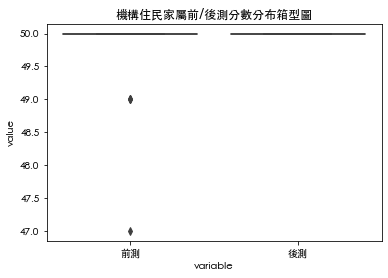

In [29]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[['前測', '後測']]))
plt.title("機構住民家屬前/後測分數分布箱型圖")
plt.show()

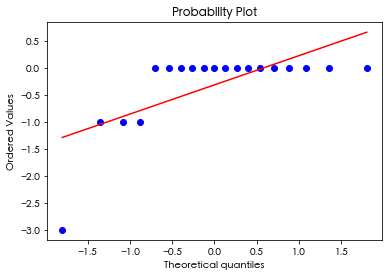

In [30]:
df['差值'] = df['前測'] - df['後測']
measurements = df['差值']
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [31]:
shapiro(df['差值'])

ShapiroResult(statistic=0.49079370498657227, pvalue=4.164090796621167e-07)

In [32]:
aa = np.mean(df['前測'])  
print('A方法均值:',aa)
bb = np.mean(df['後測'])  
print('B方法均值:',bb) 
junzhicha = aa - bb  
print('均值差:',junzhicha)

A方法均值: 49.68421052631579
B方法均值: 50.0
均值差: -0.3157894736842124


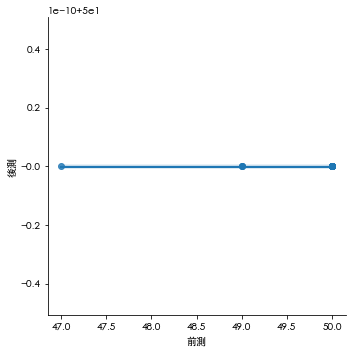

In [33]:
sns.lmplot(y='後測', x = '前測',data=df)
plt.show()

In [34]:
r = pearsonr(df['前測'], df['後測'])
print("pearson系数：",r[0])
print("P-Value：",r[1])

pearson系数： nan
P-Value： nan


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [44]:
from scipy.stats import wilcoxon

# 使用 Wilcoxon 符號秩測試  雙尾檢定
statistic, p_value = wilcoxon(df['前測'].tolist(),  df['後測'].tolist(), alternative='two-sided')

# 顯示結果
print("Wilcoxon statistic:", statistic)
print("P-value:", p_value)

# 判斷結果是否顯著
alpha = 0.05
if p_value < alpha:
    print("統計上顯著，可以拒絕虛無假設，表示前後測有差異。")
else:
    print("統計上不顯著，不能拒絕虛無假設，表示前後測無差異。")

Wilcoxon statistic: 0.0
P-value: 0.05878172135535886
統計上不顯著，不能拒絕虛無假設，表示前後測無差異。


In [41]:
print("後測正確填答率為： ", df['後測'].tolist().count(50)/len(df['後測'].tolist())*100, "%")

後測正確填答率為：  100.0 %


In [58]:
print(df['年齡'].max())
print(df['年齡'].min())

97
0


In [60]:
df[df['年齡']>100]

,ID,出生,前測,年齡,後測
